<a href="https://colab.research.google.com/github/vzeizer/Sales_ML_Forecasting/blob/master/Motobombas_Diario_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


** Otimização do Portfólio de Motobombas e Análise de Sazonalidade para Maximização de Vendas**

**Contexto do Negócio:**
Uma empresa fabricante de motobombas está enfrentando desafios na gestão de seu portfólio de produtos e no planejamento de sua produção. A diretoria comercial precisa entender melhor o comportamento das vendas para tomar decisões estratégicas sobre:
- Quais produtos mantêm performance consistente
- Se existe sazonalidade nas vendas
- Como otimizar o mix de produtos

**Problema de Negócio:**
A empresa precisa reduzir custos operacionais e aumentar a margem de lucro através de um melhor planejamento de produção e gestão de estoque. Atualmente, há problemas com:
1. Excesso de estoque de alguns modelos
2. Ruptura de estoque em outros
3. Dificuldade em prever demanda
4. Mix de produtos possivelmente não otimizado

**Perguntas de Negócio a serem Respondidas:**
1. Existe sazonalidade nas vendas de diferentes grupos de produtos?
2. Quais são os produtos mais relevantes em termos de faturamento?
3. Como se comporta a distribuição de vendas entre os diferentes grupos de produtos?
4. Existem produtos com tendência de crescimento ou declínio nas vendas?
5. Qual a correlação entre quantidade vendida e valor de faturamento por grupo de produto?

**Objetivos do Projeto:**
1. Realizar análise exploratória dos dados
2. Identificar padrões de sazonalidade
3. Segmentar produtos por performance
4. Criar visualizações que suportem a tomada de decisão
5. Propor recomendações baseadas em dados para otimização do portfólio

**Impacto Esperado:**
- Redução de 15% nos custos de estoque
- Aumento de 10% na margem de lucro
- Melhoria de 20% na precisão do planejamento de produção
- Redução de 30% nas rupturas de estoque

**Entregáveis:**
1. Dashboard interativo com principais KPIs
2. Análise de tendências e sazonalidade
3. Segmentação de produtos por performance
4. Recomendações estratégicas baseadas em dados
5. Documentação completa do projeto

Este problema é interessante para um portfólio porque:
- Demonstra capacidade de análise exploratória
- Trabalha com dados temporais
- Possui aplicação prática de negócio
- Permite mostrar habilidades de visualização
- Tem potencial para uso de diferentes técnicas analíticas

Você gostaria que eu detalhasse algum aspecto específico deste problema ou que sugerisse algumas análises específicas que poderiam ser feitas com as colunas disponíveis?

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# abrindo o relatório com os arquivos
df = pd.read_excel('/content/Lucas - Relatório saida motobombas 2018 2024 - 26.02.xls')

## **Exploratory Data Analysis**

In [ ]:
# visualizando as primeiras linhas
df.head(5)

,Dt. emissão,Cód. produto,Grupo de produto,Produto,Qt. item,Vl. faturamento,Tipo de movimento da operação
0,04/12/2018,1.140000e+02,MOTOBOMBA APL ...,MOTOBOMBA C/PREFILTRO 1.5 HP TRI.220/380V.MOD....,1,1582.00,Venda
1,14/12/2018,9.375000e+03,MOTOBOMBAS POOLTEC ...,POOLTEC MOTOBOMBA BN-2 1/2 CV TRIF ...,1,600.00,Venda
2,09/01/2018,7.890037e+12,MOTOBOMBA AP,MOTOBOMBA AP-6 2 CV 127/220V (47 x 39 x 61 cm)...,2,2481.88,Venda
3,19/01/2018,7.890037e+12,MOTOBOMBA AP,MOTOBOMBA AP-6 2 CV 127/220V (47 x 39 x 61 cm)...,2,2351.25,Venda
4,07/03/2018,7.890037e+12,MOTOBOMBA AP,MOTOBOMBA AP-6 2 CV 127/220V (47 x 39 x 61 cm)...,1,1237.50,Venda


In [ ]:
# Conhecendo as colunas do dataset
print(list(df.columns))

['Dt. emissão', 'Cód. produto', 'Grupo de produto', 'Produto', 'Qt. item', 'Vl. faturamento', 'Tipo de movimento da operação']


In [ ]:
# renomeando as colunas convenientemente
df = df.rename(columns={'Dt. emissão':'data', 'Cód. produto':'cod_produto', 'Grupo de produto':'grupo_produto', 'Produto':'produto',
       'Qt. item':'qt_item', 'Vl. faturamento':'valor_faturamento', 'Tipo de movimento da operação':'tipo_operacao'})

In [ ]:
# verificando os nulos no conjunto de dados
df.isnull().sum()

,0
data,1
cod_produto,1
grupo_produto,1
produto,1
qt_item,0
valor_faturamento,0
tipo_operacao,1


In [ ]:
# eliminando as poucas linhas com valores nulos
df = df.dropna()

In [ ]:
# imprimindo a dimensão do conjunto de dados
df.shape

(11015, 7)

In [ ]:
# descobrindo qual o percentual de Vendas e Devoluções
100*df['tipo_operacao'].value_counts(normalize=True)

,proportion
tipo_operacao,
Venda,98.992283
Devolução,1.007717


In [ ]:
# número de produtos únicos
df['cod_produto'].nunique()

67

In [ ]:
# número de grupos únicos
df['grupo_produto'].nunique()

7

In [ ]:
# número de produtos únicos
# é igual ao número de registros únicos de 'cod_produto'
df['produto'].nunique()

67

In [ ]:
# colocando a data no formato adequado
df['data'] = pd.to_datetime(df['data'],dayfirst=True)

### **Feature Engineering**

In [ ]:
# Extract year, month, day, day of week, etc.
df['year'] = df['data'].dt.year
df['month'] = df['data'].dt.month
df['day'] = df['data'].dt.day
df['dayofweek'] = df['data'].dt.dayofweek  # Monday = 0, Sunday = 6
df['is_weekend'] = df['dayofweek'].isin([5, 6])  # Boolean for weekend days

# More advanced features (consider based on your needs)
df['week_of_year'] = df['data'].dt.isocalendar().week
df['quarter'] = df['data'].dt.quarter

In [ ]:
# olhando as 5 primeiras linhas
df.head(5)

,data,cod_produto,grupo_produto,produto,qt_item,valor_faturamento,tipo_operacao,year,month,day,dayofweek,is_weekend,week_of_year,quarter
0,2018-12-04,1.140000e+02,MOTOBOMBA APL ...,MOTOBOMBA C/PREFILTRO 1.5 HP TRI.220/380V.MOD....,1,1582.00,Venda,2018,12,4,1,False,49,4
1,2018-12-14,9.375000e+03,MOTOBOMBAS POOLTEC ...,POOLTEC MOTOBOMBA BN-2 1/2 CV TRIF ...,1,600.00,Venda,2018,12,14,4,False,50,4
2,2018-01-09,7.890037e+12,MOTOBOMBA AP,MOTOBOMBA AP-6 2 CV 127/220V (47 x 39 x 61 cm)...,2,2481.88,Venda,2018,1,9,1,False,2,1
3,2018-01-19,7.890037e+12,MOTOBOMBA AP,MOTOBOMBA AP-6 2 CV 127/220V (47 x 39 x 61 cm)...,2,2351.25,Venda,2018,1,19,4,False,3,1
4,2018-03-07,7.890037e+12,MOTOBOMBA AP,MOTOBOMBA AP-6 2 CV 127/220V (47 x 39 x 61 cm)...,1,1237.50,Venda,2018,3,7,2,False,10,1


In [ ]:
df['grupo_produto'].unique()

array(['MOTOBOMBA APL                                     ',
       'MOTOBOMBAS POOLTEC                                ',
       'MOTOBOMBA AP',
       'MOTOBOMBA AD                                      ',
       'MOTOBOMBA APH                                     ',
       'MOTOBOMBA APP',
       'MOTOBOMBA AHP                                     '], dtype=object)

In [ ]:
df['grupo_produto'] = df['grupo_produto'].str.replace(' ', '_', 1).str.replace(' ', '')

In [ ]:
df['grupo_produto'].unique()

array(['MOTOBOMBA_APL', 'MOTOBOMBAS_POOLTEC', 'MOTOBOMBA_AP',
       'MOTOBOMBA_AD', 'MOTOBOMBA_APH', 'MOTOBOMBA_APP', 'MOTOBOMBA_AHP'],
      dtype=object)

In [ ]:
# ordenando o dataframe por código de produto e data
df = df.sort_values(by=['grupo_produto','data'])

In [ ]:
# olhando os 10 primeiros registros
df.head(10)

,data,cod_produto,grupo_produto,produto,qt_item,valor_faturamento,tipo_operacao,year,month,day,dayofweek,is_weekend,week_of_year,quarter
10401,2018-01-11,7.890037e+12,MOTOBOMBAS_POOLTEC,POOLTEC MOTOBOMBA BN-0 1/4 CV MONO/BIF ...,5,1641.4,Venda,2018,1,11,3,False,2,1
10411,2018-01-11,7.890037e+12,MOTOBOMBAS_POOLTEC,POOLTEC MOTOBOMBA BN-1 1/3 CV MONO/BIF ...,20,6836.4,Venda,2018,1,11,3,False,2,1
10423,2018-01-11,7.890037e+12,MOTOBOMBAS_POOLTEC,POOLTEC MOTOBOMBA BN-2 1/2 CV MONO/BIF ...,37,13320.0,Venda,2018,1,11,3,False,2,1
10442,2018-01-11,7.890037e+12,MOTOBOMBAS_POOLTEC,POOLTEC MOTOBOMBA BN-3 3/4 CV MONO/BIF ...,22,8591.0,Venda,2018,1,11,3,False,2,1
10453,2018-01-11,7.890037e+12,MOTOBOMBAS_POOLTEC,POOLTEC MOTOBOMBA BN-4 1 CV MONO/BIF. ...,7,2866.5,Venda,2018,1,11,3,False,2,1
10473,2018-01-11,7.890037e+12,MOTOBOMBAS_POOLTEC,POOLTEC MOTOBOMBA BN-5 1.1/2 CV MONO/BIF ...,5,2750.0,Venda,2018,1,11,3,False,2,1
10402,2018-02-07,7.890037e+12,MOTOBOMBAS_POOLTEC,POOLTEC MOTOBOMBA BN-0 1/4 CV MONO/BIF ...,5,1641.4,Venda,2018,2,7,2,False,6,1
10412,2018-02-07,7.890037e+12,MOTOBOMBAS_POOLTEC,POOLTEC MOTOBOMBA BN-1 1/3 CV MONO/BIF ...,20,6836.4,Venda,2018,2,7,2,False,6,1
10424,2018-02-07,7.890037e+12,MOTOBOMBAS_POOLTEC,POOLTEC MOTOBOMBA BN-2 1/2 CV MONO/BIF ...,37,13320.0,Venda,2018,2,7,2,False,6,1
10443,2018-02-07,7.890037e+12,MOTOBOMBAS_POOLTEC,POOLTEC MOTOBOMBA BN-3 3/4 CV MONO/BIF ...,22,8591.0,Venda,2018,2,7,2,False,6,1


### Aqui é a EDA **sem transformar o dataframe, interpolando datas ausentes com Zeros**.

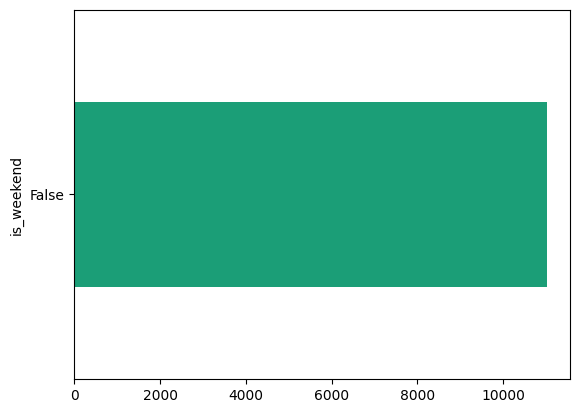

In [ ]:
df.groupby('is_weekend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]]

- There is no weekend data in the dataset.

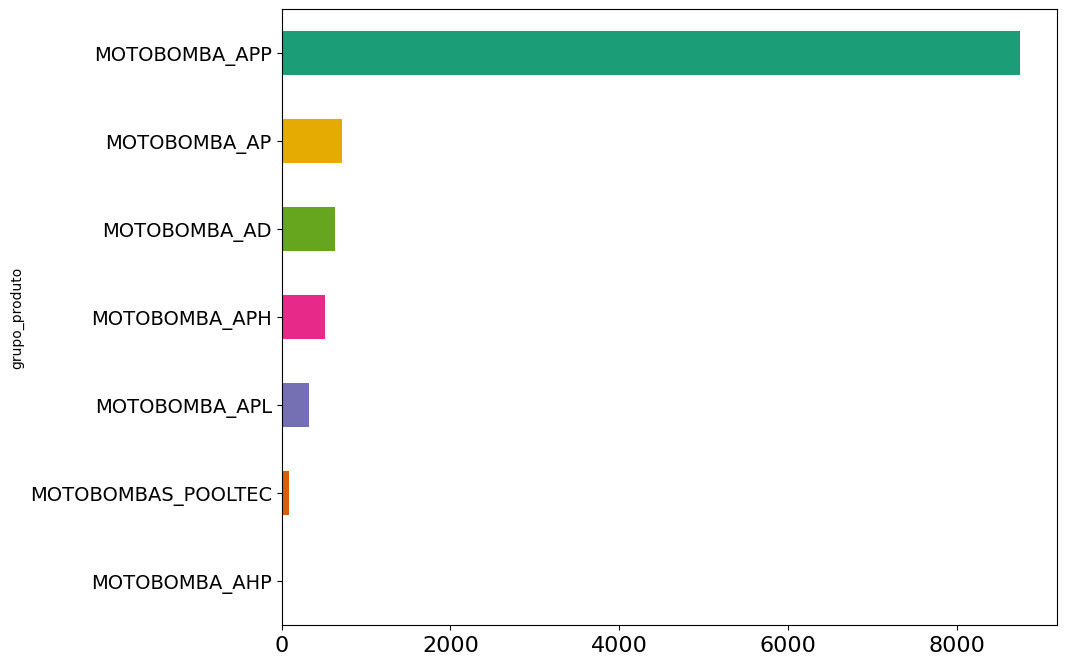

In [ ]:
plt.figure(figsize=[10,8])

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('grupo_produto').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]]

plt.xticks(size=16)
plt.yticks(size=14)

plt.show()

- From the graphics above, one can notice that the 'MOTOBOMBA_APP' group code possesses by far the largest amount of items sold, followed by 'MOTOBOMBA_AP' and 'MOTOBOMBA_AD'. This point out that there is just enoguh data to model the 'MOTOBOMBA_APP' group code.

In [ ]:
import plotly.express as px

# Assuming your DataFrame is named 'df'
fig = px.line(
    df.sort_values(by=['cod_produto','data']),  # Dataframe
    y="qt_item",  # Y-axis variable
    x="data",  # X-axis variable
    color="cod_produto",  # Color variable for different categories
    hover_name="cod_produto",  # Optional: Name displayed on hover
)

fig.show()


In [ ]:
fig=px.line(df.sort_values(by='data'),x='data',y='qt_item',animation_frame='cod_produto',
            animation_group='qt_item',color='cod_produto',markers=True,template='plotly_dark',title='<b> Animação da Quantidade de Itens vendidos por ano por código de produto')
fig.show()

In [ ]:
import plotly.express as px

# Assuming your DataFrame is named 'df'
fig = px.line(
    df.sort_values(by=['grupo_produto','data']),  # Dataframe
    y="qt_item",  # Y-axis variable
    x="data",  # X-axis variable
    color="grupo_produto",  # Color variable for different categories
    hover_name="grupo_produto",  # Optional: Name displayed on hover
)

fig.show()

In [ ]:
fig=px.line(df.sort_values(by='data'),x='data',y='qt_item',animation_frame='grupo_produto',
            animation_group='qt_item',color='grupo_produto',markers=True,template='plotly_dark',title='<b> Animação da Quantidade de Itens vendidos por ano por grupo de produto')
fig.show()

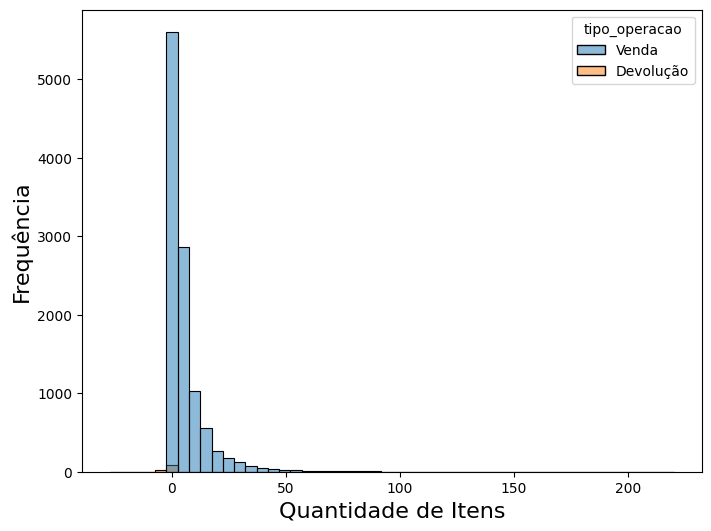

In [ ]:
plt.figure(figsize=[8,6])

sns.histplot(data=df,x='qt_item',hue='tipo_operacao',bins=50)

plt.xlabel('Quantidade de Itens',size=16)
plt.ylabel('Frequência',size=16)

plt.show()

- From the above graphics, one can notice the distribution of the items sold follows an exponential distribution, while the distribution of items order return is unspecified.

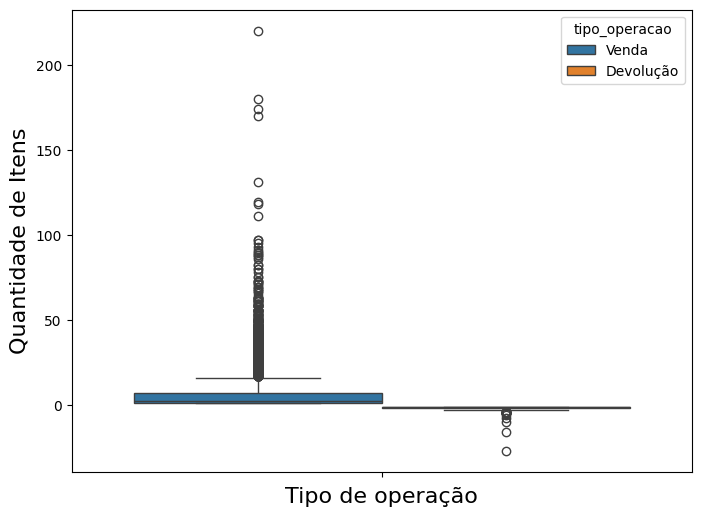

In [ ]:
plt.figure(figsize=[8,6])

sns.boxplot(data=df,y='qt_item',hue='tipo_operacao')
plt.xlabel('Tipo de operação',size=16)
plt.ylabel('Quantidade de Itens',size=16)

plt.show()

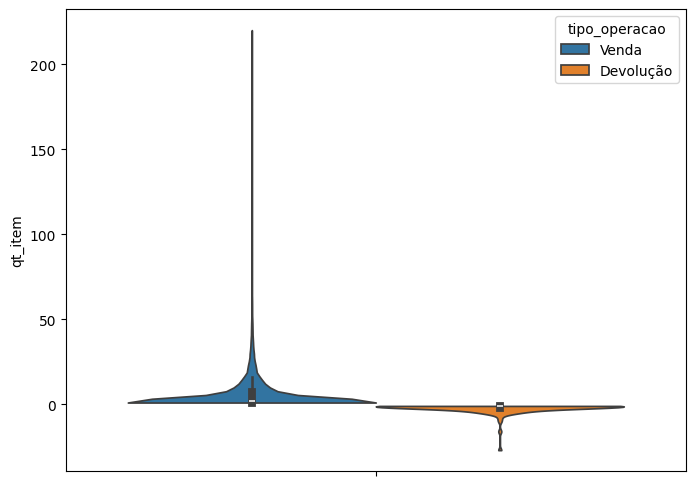

In [ ]:
plt.figure(figsize=[8,6])

sns.violinplot(data=df,y='qt_item',cut=0,hue='tipo_operacao')

plt.show()

- From the above graphics, one can notice that the amount of items sold was much greater than the items order return

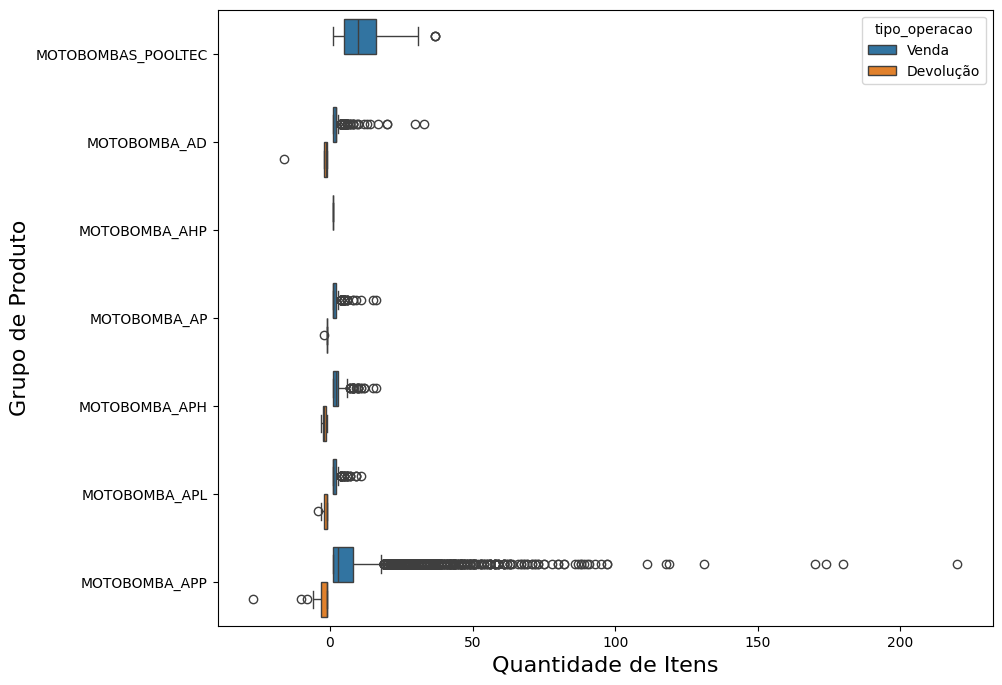

In [ ]:
plt.figure(figsize=[10,8])

sns.boxplot(data=df,x='qt_item',y='grupo_produto',hue='tipo_operacao')

plt.xlabel('Quantidade de Itens',size=16)
plt.ylabel('Grupo de Produto',size=16)

plt.show()

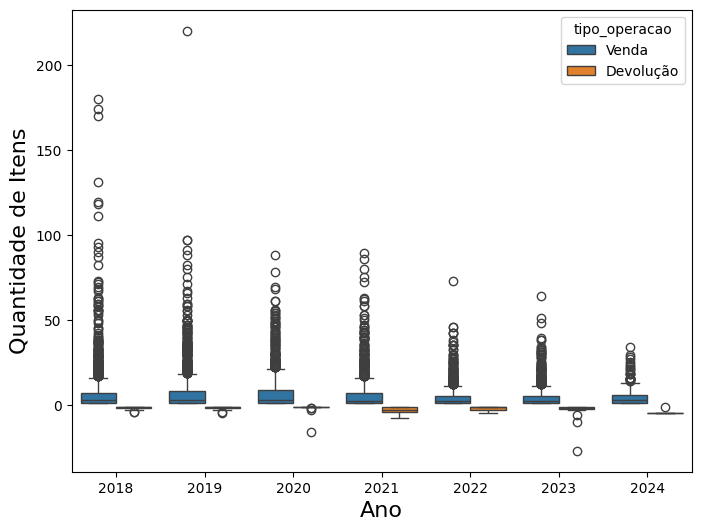

In [ ]:
plt.figure(figsize=[8,6])

sns.boxplot(data=df,y='qt_item',x='year',hue='tipo_operacao')

plt.ylabel('Quantidade de Itens',size=16)
plt.xlabel('Ano',size=16)

plt.show()

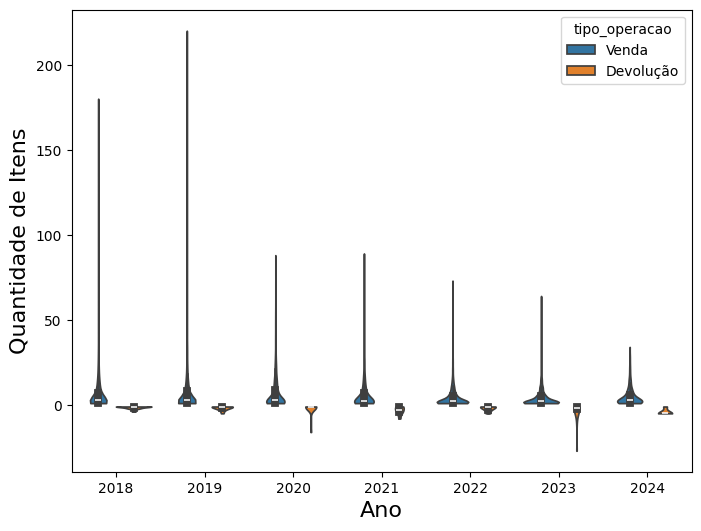

In [ ]:
plt.figure(figsize=[8,6])

sns.violinplot(data=df,y='qt_item',x='year',cut=0,hue='tipo_operacao')

plt.ylabel('Quantidade de Itens',size=16)
plt.xlabel('Ano',size=16)

plt.show()

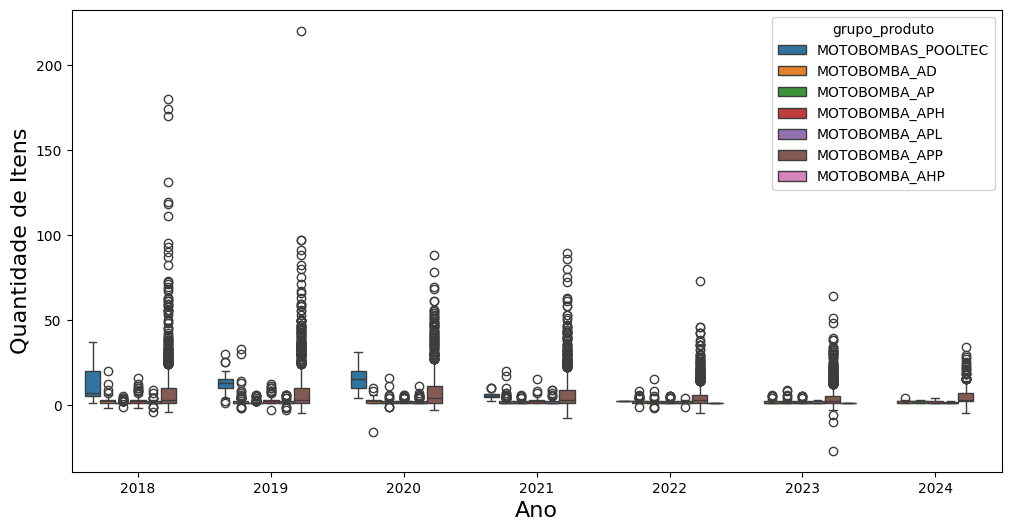

In [ ]:
plt.figure(figsize=[12,6])

sns.boxplot(data=df,y='qt_item',x='year',hue='grupo_produto')

plt.ylabel('Quantidade de Itens',size=16)
plt.xlabel('Ano',size=16)

plt.show()

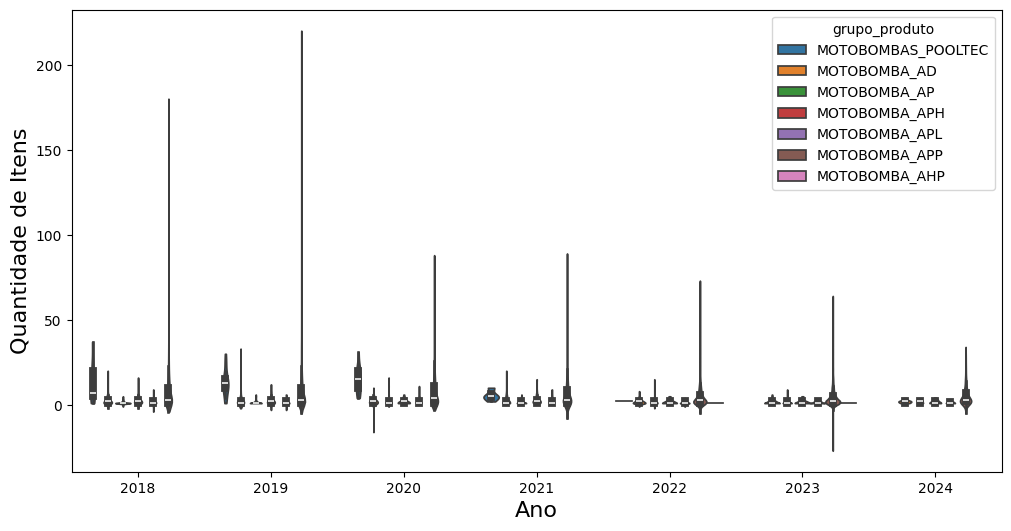

In [ ]:
plt.figure(figsize=[12,6])

sns.violinplot(data=df,y='qt_item',x='year',hue='grupo_produto',cut=0)

plt.ylabel('Quantidade de Itens',size=16)
plt.xlabel('Ano',size=16)

plt.show()

- From the three pictures above, one can notice that the largest amount of sold items were 2018 and 2019, followed by a decrease, maybe due to the pandemics.

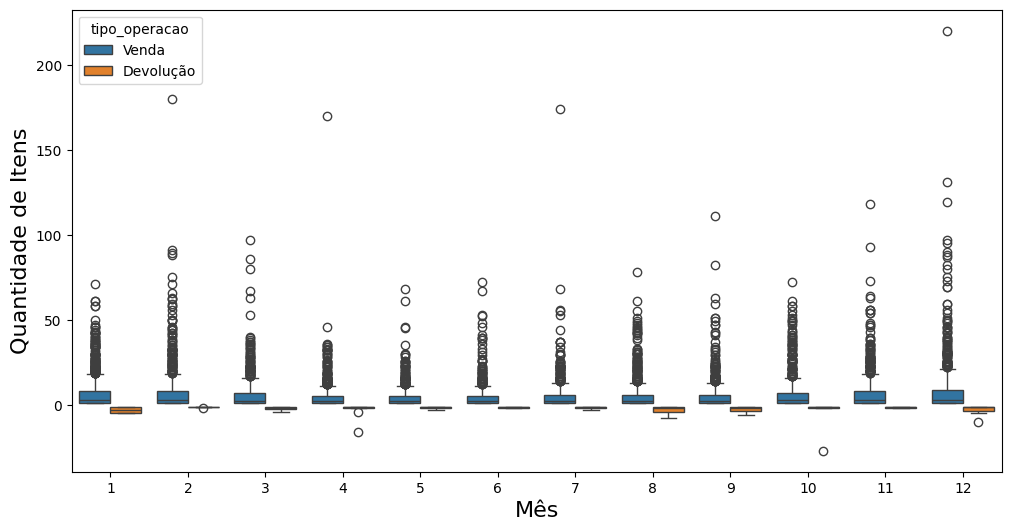

In [ ]:
plt.figure(figsize=[12,6])

sns.boxplot(data=df,y='qt_item',x='month',hue='tipo_operacao')

plt.ylabel('Quantidade de Itens',size=16)
plt.xlabel('Mês',size=16)

plt.show()

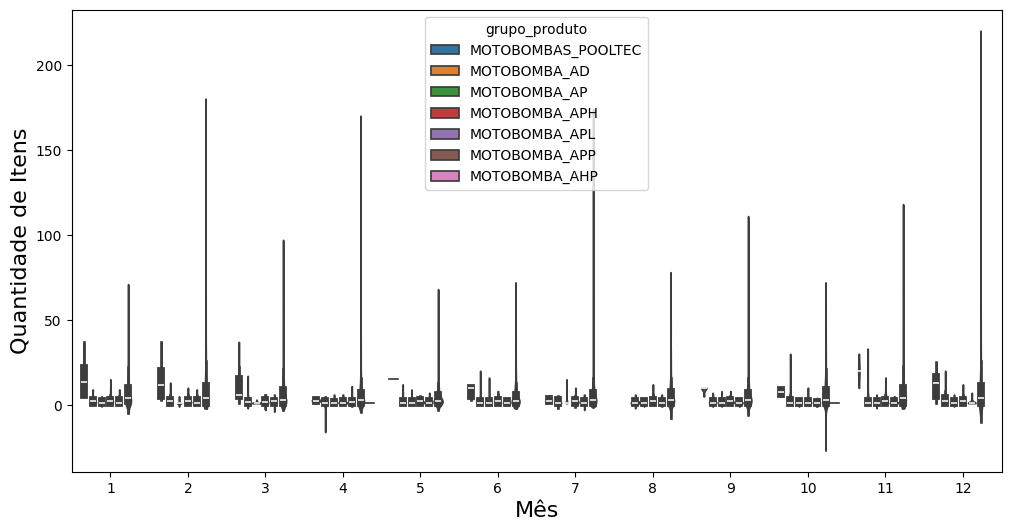

In [ ]:
plt.figure(figsize=[12,6])

sns.violinplot(data=df,y='qt_item',x='month',hue='grupo_produto',cut=0)

plt.ylabel('Quantidade de Itens',size=16)
plt.xlabel('Mês',size=16)

plt.show()

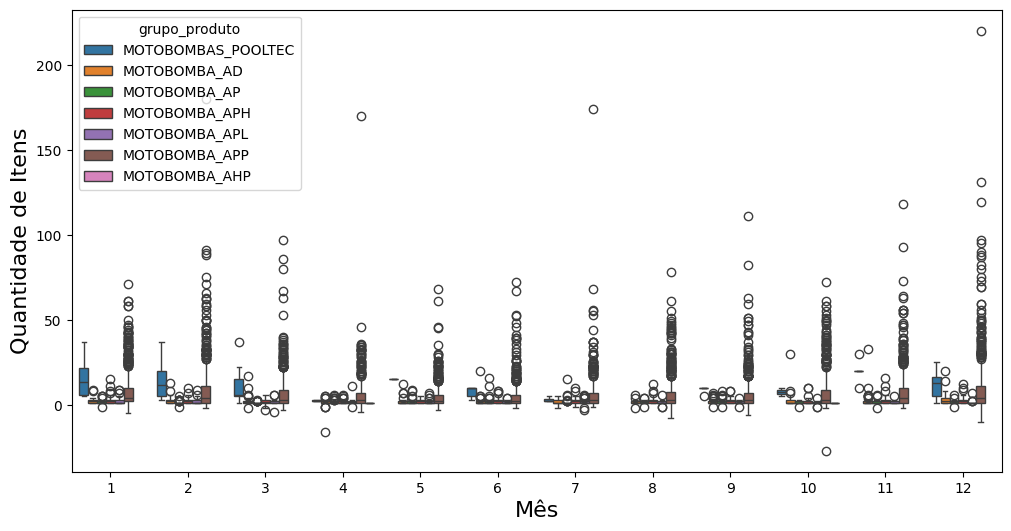

In [ ]:
plt.figure(figsize=[12,6])

sns.boxplot(data=df,y='qt_item',x='month',hue='grupo_produto')

plt.ylabel('Quantidade de Itens',size=16)
plt.xlabel('Mês',size=16)

plt.show()

- From the Violin and Box plots above, one can notice that on November and December have an increase in the amount of items sold, followed by a decrease in January.

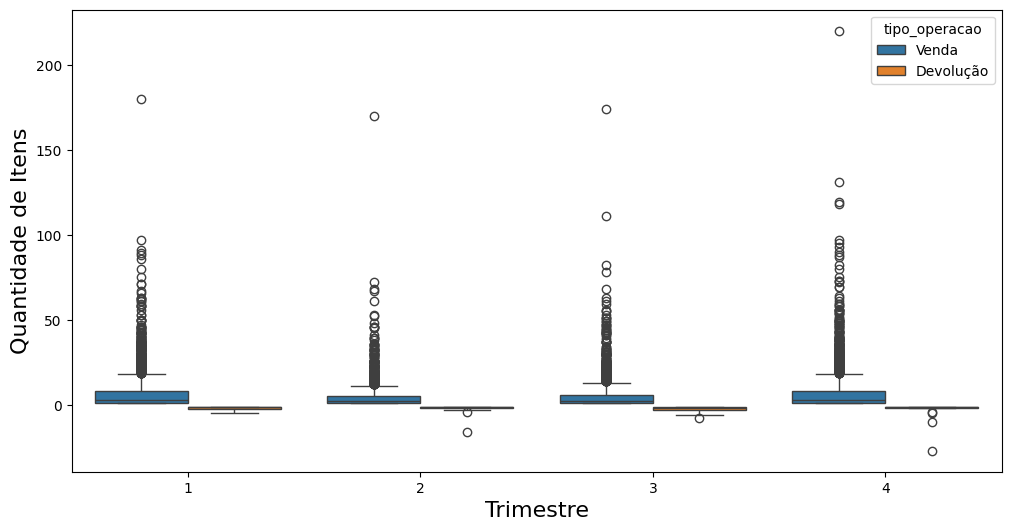

In [ ]:
plt.figure(figsize=[12,6])

sns.boxplot(data=df,y='qt_item',x='quarter',hue='tipo_operacao')

plt.ylabel('Quantidade de Itens',size=16)
plt.xlabel('Trimestre',size=16)

plt.show()

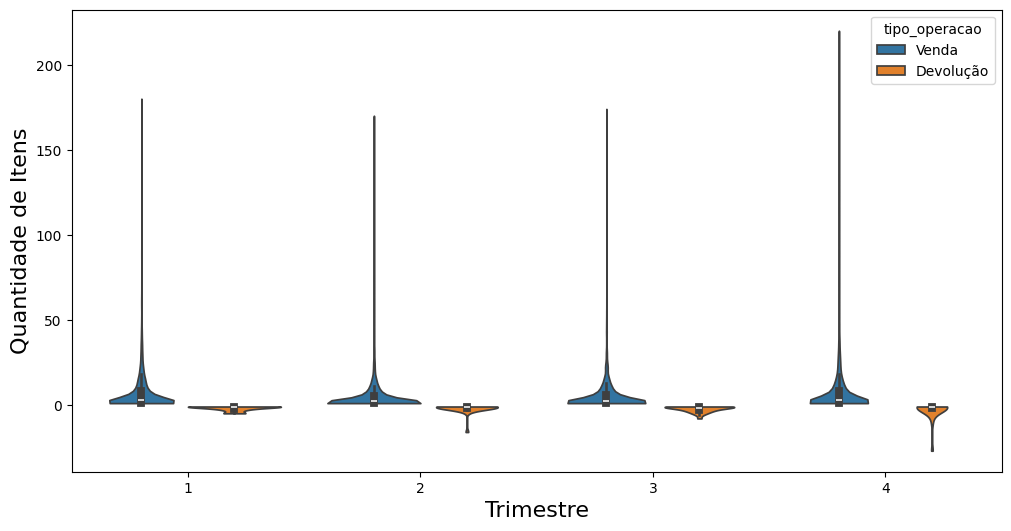

In [ ]:
plt.figure(figsize=[12,6])

sns.violinplot(data=df,y='qt_item',x='quarter',cut=0,hue='tipo_operacao')

plt.ylabel('Quantidade de Itens',size=16)
plt.xlabel('Trimestre',size=16)

plt.show()

- One can notice that for the first three quarters, the amount of sold items was similar, but for the last quarter there was an increase in the trend, as can be evidenced in the boxplot and violinplot above.

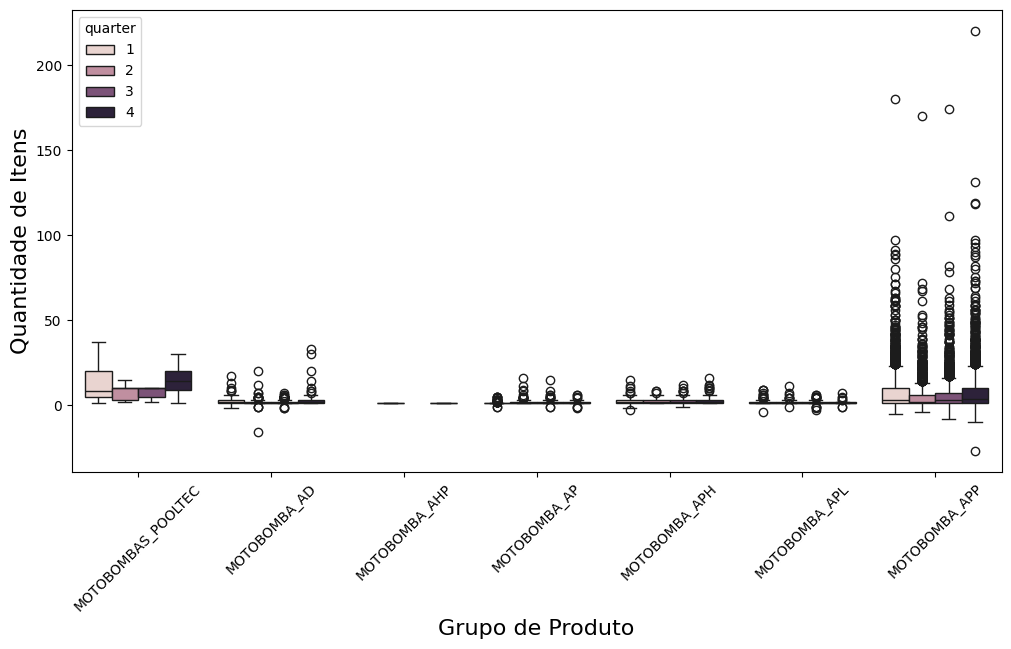

In [ ]:
plt.figure(figsize=[12,6])

sns.boxplot(data=df,y='qt_item',x='grupo_produto',hue='quarter')

plt.xlabel('Grupo de Produto',size=16)
plt.xticks(rotation=45)
plt.ylabel('Quantidade de Itens',size=16)

plt.show()

### **Correlation Map**

- Pode-se notar que os atributos tem uma fraca correlação entre si.

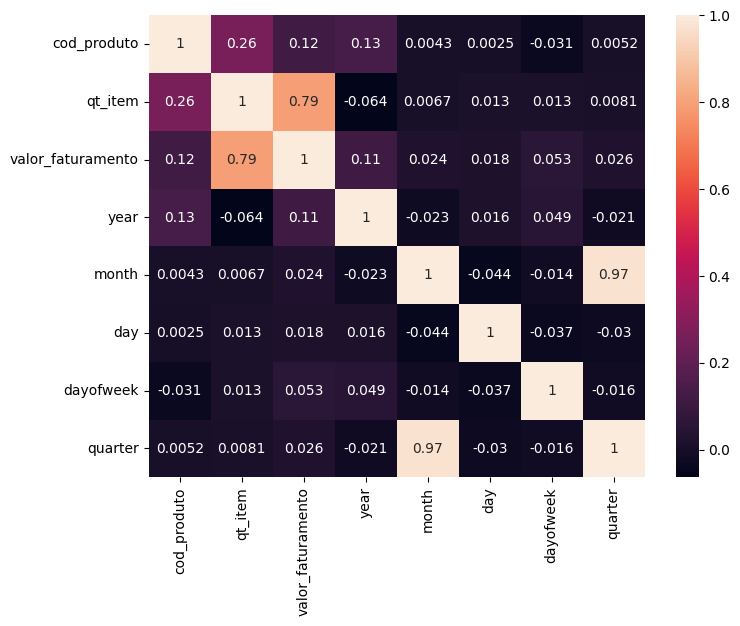

In [ ]:
plt.figure(figsize=[8,6])

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
corr = newdf.corr(method='spearman')
sns.heatmap(corr,annot=True)

plt.show()

## **Summary of the main Findings**

1. 'MOTOBOMBA_APP' group code is by far the group code that can be considered for further modeling analysis, due to the fact that it has much more data available than the other groups.
2. There is no weekend data in this dataset.
3. There are much more sold items than items order return, then the last one should be dropped out of the data.
4. Items are in general much more sold on November and December, followed by a decrease trend on January.
5. At 2018, 2019 there have been the largest amount of items sold in this database, followed by a decrease that might be related to the COVID-19 pandemics.
6. According to the correlation matrix, there are very weakly correlated features in this dataset.